# Don't Delay

A Capstone project for The Data Incubator
by Stacy Karthas

In [3]:
%matplotlib inline
import matplotlib
import seaborn as sns
import plotly.plotly as py
matplotlib.rcParams['savefig.dpi'] = 144


The Problem: 
Millions of Americans take domestic flights within the United States every day and many of them will be delayed. This can cause unforeseen circumstances to ruin plans and engagements. 

The Process:
29 years of data for delays and cancelations of domestic flights, along with passenger information is available via the US department of Transportation. This data has been and will be used to predict the likelihood of flight delay.


The Solution:
An application that would predict the likelihood and length of a delay a customer can expect depending on the flight they choose. 

Added Bonus: 
If customers begin using this application, airlines are more likely to go to greater lengths to avoid delays so they can be more competitive and retain customers.

Getting the data from: [US_DOT](http://www.transtats.bts.gov/DL_SelectFields.asp?Table_ID=236&DB_Short_Name=On-Time)

Additional Plots are available in my Plotly dashboard [here](https://plot.ly/dashboard/skarthas:30/present)

In [4]:
import pandas as pd
df_oct15 = pd.read_csv('758944068_T_ONTIMEoct15.csv')
df_nov15 = pd.read_csv('758944068_T_ONTIMEnov2015.csv')
df_dec15 = pd.read_csv('758944068_T_ONTIMEdec2015.csv')
df_jan16 = pd.read_csv('758944068_T_ONTIMEjan2016.csv')#545087628_T_ONTIME0116.csv')
df_feb16 = pd.read_csv('758944068_T_ONTIMEfeb2016.csv')
df_mar16 = pd.read_csv('758944068_T_ONTIMEmar2016.csv')
df_apr16 = pd.read_csv('758944068_T_ONTIMEapr2016.csv')
df_may16 = pd.read_csv('758944068_T_ONTIMEmay2016.csv')
df_jun16 = pd.read_csv('758944068_T_ONTIMEjun2016.csv')
df_jul16 = pd.read_csv('758944068_T_ONTIMEjul2016.csv')
df_aug16 = pd.read_csv('758944068_T_ONTIMEaug2016.csv')
df_sep16 = pd.read_csv('758944068_T_ONTIMEsep2016.csv')
#df_oct16 = pd.read_csv('758944068_T_ONTIMEoct2016.csv')
#df_nov16 = pd.read_csv('545087628_T_ONTIME1116.csv')
#df_dec16 = pd.read_csv('545087628_T_ONTIME1216.csv')

/opt/conda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning:

Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.



In [5]:
df_2016 = pd.concat([df_oct15,df_nov15,df_dec15,df_jan16,df_feb16,df_mar16,df_apr16,df_may16,df_jun16,df_jul16,df_aug16,df_sep16])

Load in a dataframe of airports and their longitude and latitude

In [68]:
df_2016.columns

Index([u'DAY_OF_WEEK', u'FL_DATE', u'UNIQUE_CARRIER', u'TAIL_NUM', u'FL_NUM',
       u'ORIGIN_AIRPORT_ID', u'ORIGIN', u'ORIGIN_CITY_NAME',
       u'ORIGIN_STATE_ABR', u'ORIGIN_WAC', u'DEST_AIRPORT_ID', u'DEST',
       u'DEST_CITY_NAME', u'DEST_STATE_ABR', u'DEST_WAC', u'CRS_DEP_TIME',
       u'DEP_TIME', u'DEP_DELAY', u'DEP_DELAY_NEW', u'CRS_ARR_TIME',
       u'ARR_TIME', u'CANCELLED', u'CANCELLATION_CODE', u'DIVERTED',
       u'CRS_ELAPSED_TIME', u'ACTUAL_ELAPSED_TIME', u'DISTANCE',
       u'CARRIER_DELAY', u'WEATHER_DELAY', u'NAS_DELAY', u'SECURITY_DELAY',
       u'LATE_AIRCRAFT_DELAY', u'Unnamed: 32'],
      dtype='object')

In [122]:
df_2016=df_2016[df_2016['CANCELLED']==0.0]


Some Statistics:

In [5]:
df_2016['DEP_DELAY_NEW'].mean()

11.80930656022165

In [7]:
df_2016['DEP_DELAY_NEW'].median()

0.0

In [8]:
df_2016.DEP_DELAY_NEW.max()

1964.0

In [9]:
df_2016['DEP_DELAY_NEW'].min()

0.0

A few exploratory plots:

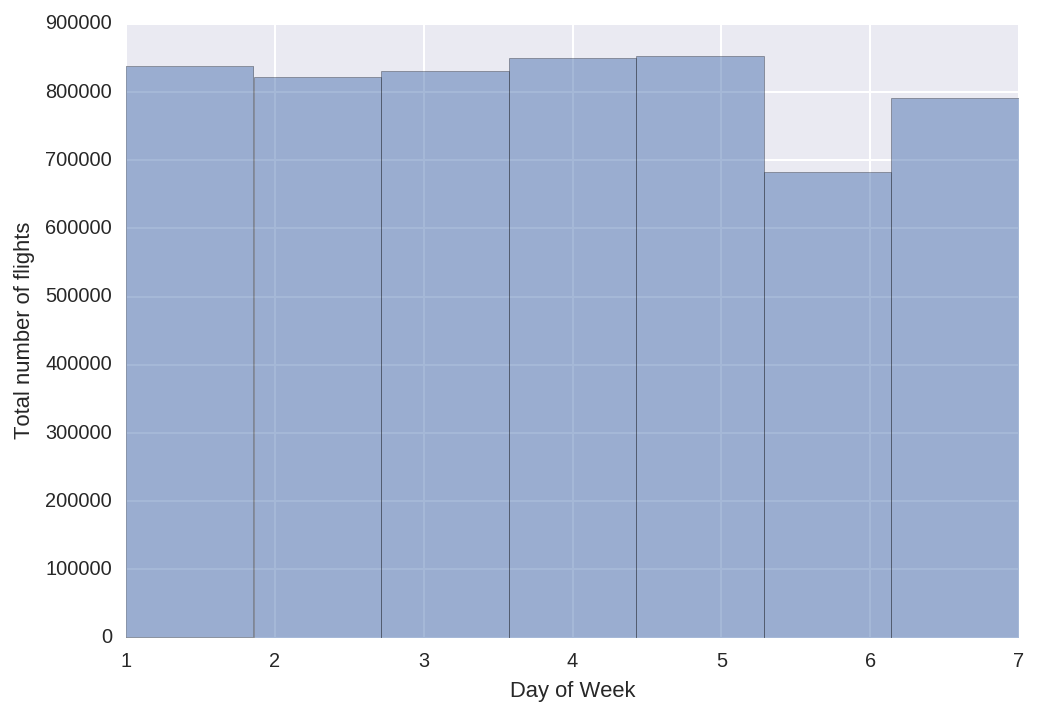

In [10]:
#distribution of flights
plt_dow = df_2016['DAY_OF_WEEK'].hist(bins=7, alpha=0.5)
plt_dow.set_xlabel('Day of Week')
plt_dow.set_ylabel('Total number of flights')

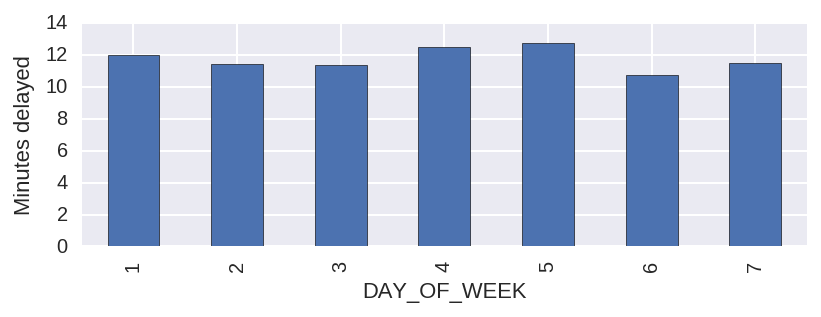

In [21]:
plt_dow = df_2016.groupby('DAY_OF_WEEK')['DEP_DELAY_NEW'].mean().plot.bar(figsize=(6.5,2))
plt_dow.set_ylabel('Minutes delayed')

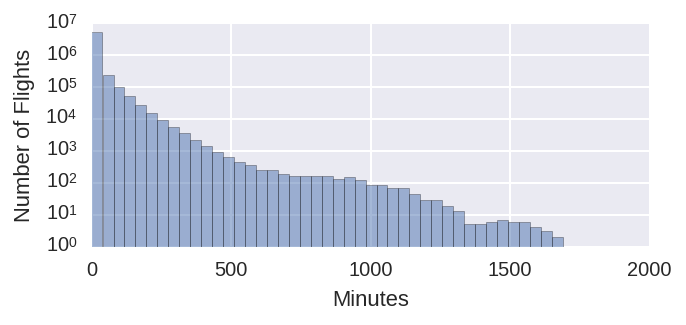

In [11]:
plt_del = df_2016['DEP_DELAY_NEW'].hist(bins=50, alpha=0.5,figsize=(5,2))
plt_del.set_xlabel('Minutes')
plt_del.set_ylabel('Number of Flights')
#plt_del.set_xlim(-100, 2000)
plt_del.set_yscale('log')

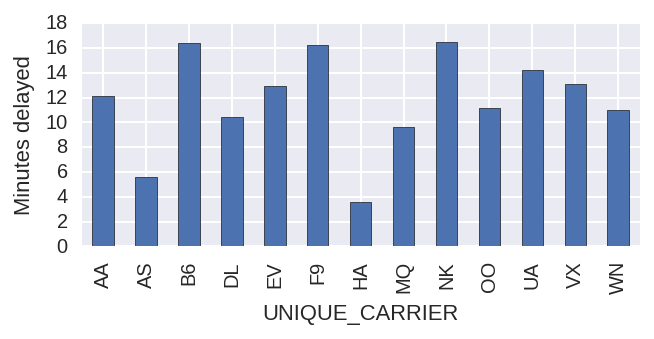

In [22]:
plt_UC = df_2016.groupby('UNIQUE_CARRIER')['DEP_DELAY_NEW'].mean().plot.bar(figsize=(5,2))
plt_UC.set_ylabel('Minutes delayed')

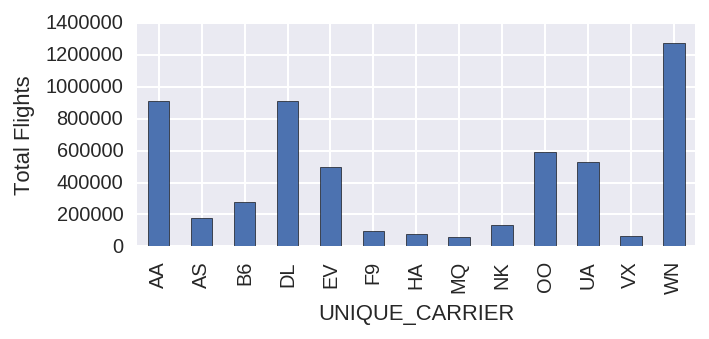

In [23]:
plt_UC = df_2016.groupby('UNIQUE_CARRIER')['DEP_DELAY_NEW'].count().plot.bar(figsize=(5,2))
plt_UC.set_ylabel('Total Flights')

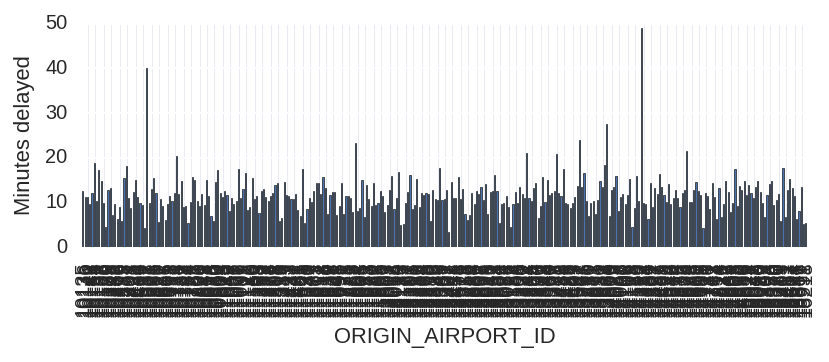

In [24]:
plt_UA = df_2016.groupby('ORIGIN_AIRPORT_ID')['DEP_DELAY_NEW'].mean().plot.bar(figsize=(6.5,2))
plt_UA.set_ylabel('Minutes delayed')

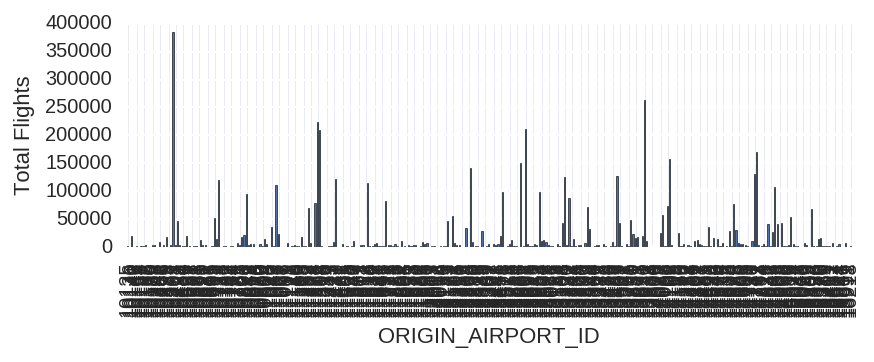

In [25]:
plt_UAflights = df_2016.groupby('ORIGIN_AIRPORT_ID')['DAY_OF_WEEK'].count().plot.bar(figsize=(6.5,2))
plt_UAflights.set_ylabel('Total Flights')

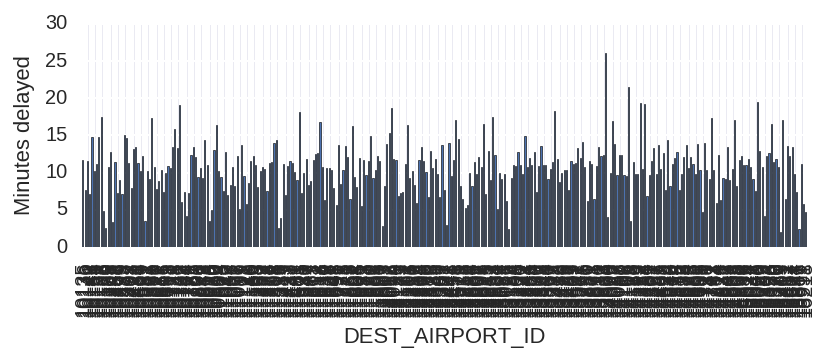

In [27]:
plt_dow = df_2016.groupby('DEST_AIRPORT_ID')['DEP_DELAY_NEW'].mean().plot.bar(figsize=(6.5,2))
plt_dow.set_ylabel('Minutes delayed')

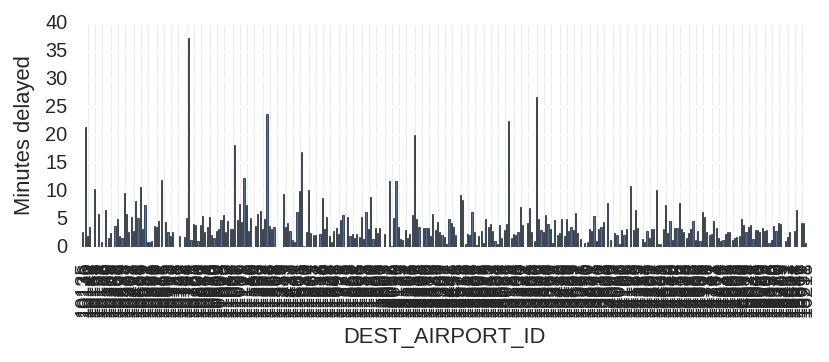

In [58]:
plt_dow = df_2016.groupby('DEST_AIRPORT_ID')['WEATHER_DELAY'].mean().plot.bar(figsize=(6.5,2))
plt_dow.set_ylabel('Minutes delayed')

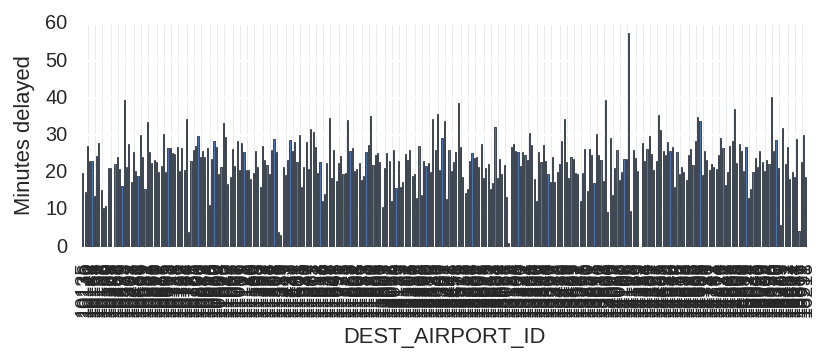

In [59]:
plt_dow = df_2016.groupby('DEST_AIRPORT_ID')['LATE_AIRCRAFT_DELAY'].mean().plot.bar(figsize=(6.5,2))
plt_dow.set_ylabel('Minutes delayed')

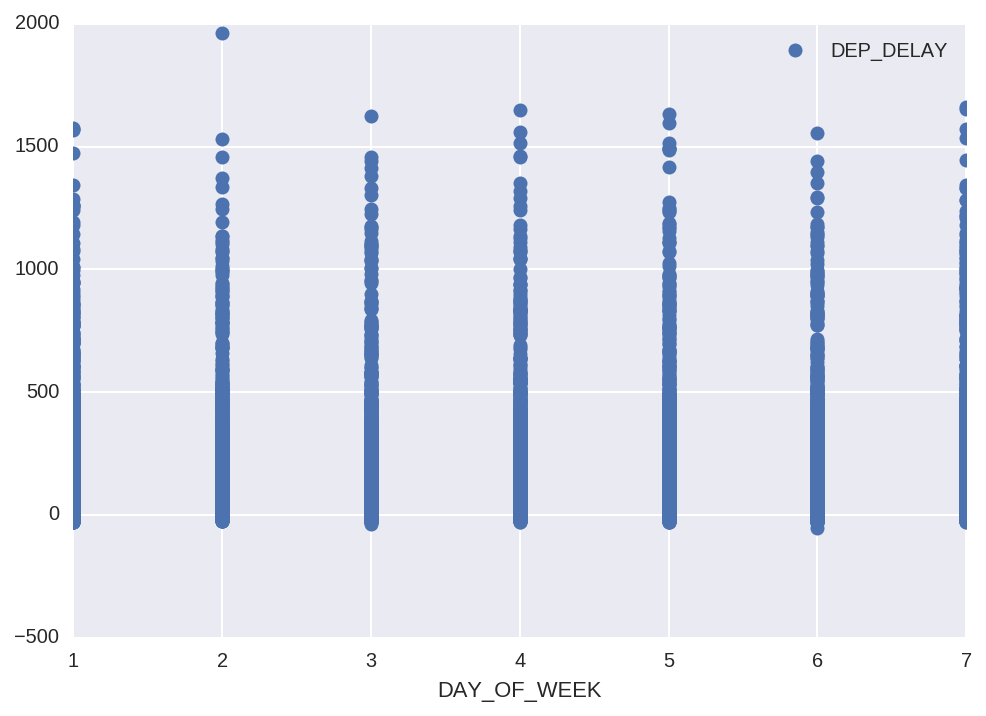

In [28]:
df_2016[df_2016['UNIQUE_CARRIER'] =='AA'].plot(x='DAY_OF_WEEK',y='DEP_DELAY',style='o')


In [16]:
#plt_weather = df_2016.WEATHER_DELAY.dropna().plot.bar()

#plt_UC = df_2016.groupby('DAY_OF_WEEK')['delay'].mean().plot.bar(figsize=(6.5,2))
#plt_UC.set_ylabel('Minutes delayed')


In [17]:
#df_2016.WEATHER_DELAY

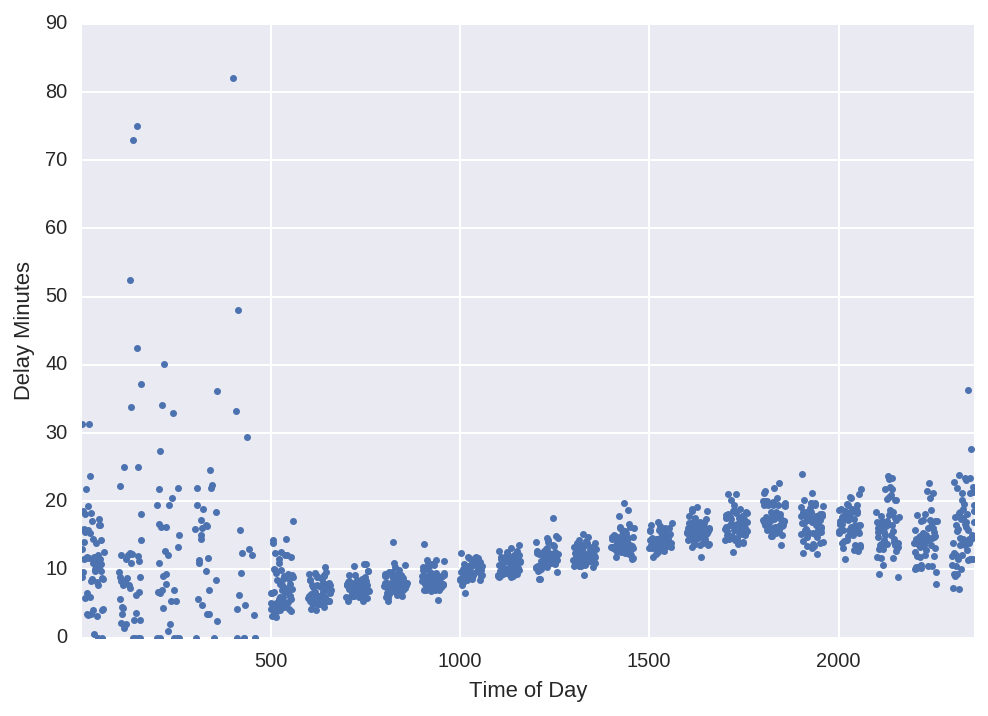

In [29]:
plt_tod = df_2016.groupby('CRS_DEP_TIME')['DEP_DELAY_NEW'].mean().plot(style='.')
plt_tod.set_xlabel('Time of Day')
plt_tod.set_ylabel('Delay Minutes')

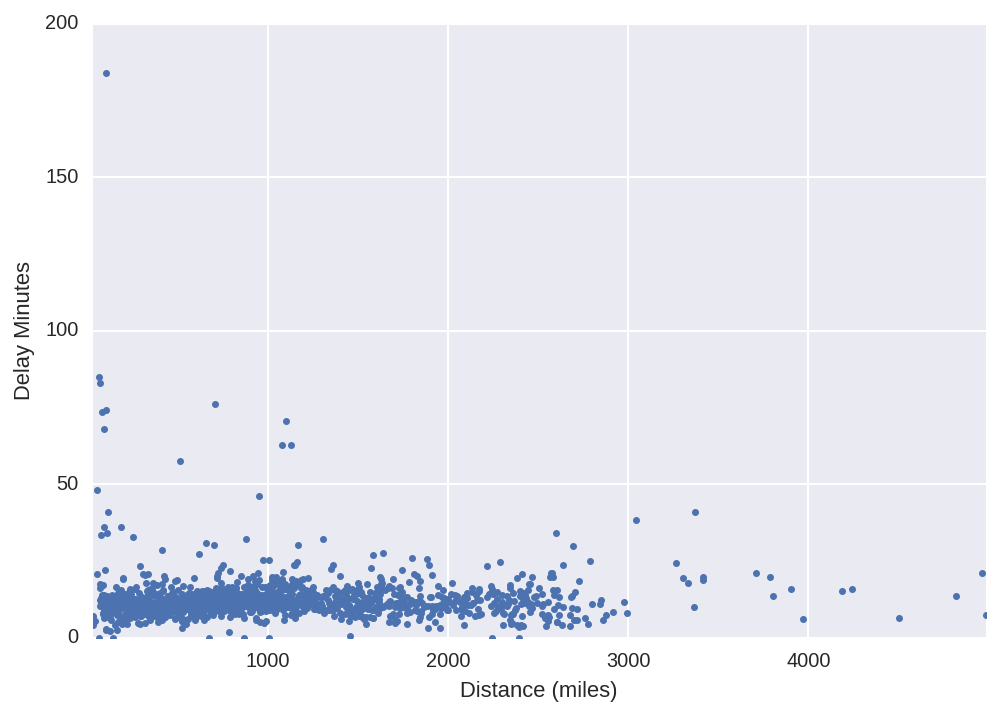

In [69]:
plt_tod = df_2016.groupby('DISTANCE')['DEP_DELAY_NEW'].mean().plot(style='.')
plt_tod.set_xlabel('Distance (miles)')
plt_tod.set_ylabel('Delay Minutes')

In [30]:
#df_2016[:100]

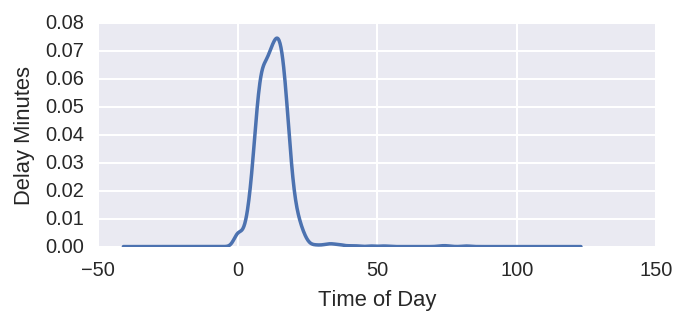

In [31]:
#fig, ax = plt.subplots(figsize=(8,6))
#for df in df_2016.groupby('')
plt_tod = df_2016.groupby('CRS_DEP_TIME')['DEP_DELAY_NEW'].mean().plot(kind = 'kde',figsize=(5,2))
plt_tod.set_xlabel('Time of Day')
plt_tod.set_ylabel('Delay Minutes')

In [32]:
carriers = df_2016.UNIQUE_CARRIER.unique() # unique list of carriers

In [33]:
df_2016[:5]

,DAY_OF_WEEK,FL_DATE,UNIQUE_CARRIER,TAIL_NUM,FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,ORIGIN_WAC,...,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 32
0,1,2015-10-05,AA,N798AA,1,12478,JFK,"New York, NY",NY,22,...,0.0,370.0,357.0,2475.0,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2015-10-12,AA,N791AA,1,12478,JFK,"New York, NY",NY,22,...,0.0,370.0,345.0,2475.0,NaN,NaN,NaN,NaN,NaN,NaN
2,1,2015-10-19,AA,N791AA,1,12478,JFK,"New York, NY",NY,22,...,0.0,370.0,373.0,2475.0,NaN,NaN,NaN,NaN,NaN,NaN
3,1,2015-10-26,AA,N792AA,1,12478,JFK,"New York, NY",NY,22,...,0.0,370.0,347.0,2475.0,NaN,NaN,NaN,NaN,NaN,NaN
4,1,2015-10-05,AA,N787AA,2,12892,LAX,"Los Angeles, CA",CA,91,...,0.0,340.0,323.0,2475.0,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
df_uc = [df_2016[df_2016.UNIQUE_CARRIER == i] for i in carriers]

In [35]:
newdf_uc = [i.groupby('CRS_DEP_TIME')['delay'].mean() for i in df_uc ]

KeyError: 'Column not found: delay'

In [ ]:
newdf_uc = [i.groupby('CRS_DEP_TIME')['delay'].mean() for i in df_uc ]
type(newdf_uc[0])

(0, 2400)

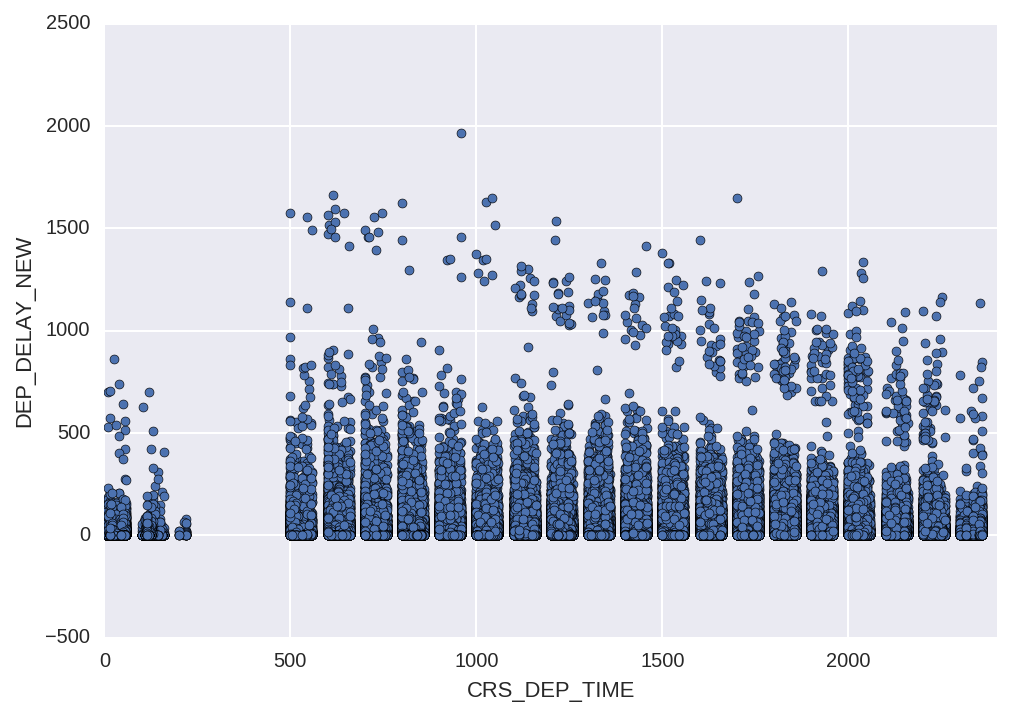

In [36]:
dfAA = df_2016[df_2016.UNIQUE_CARRIER=='AA']
dfB6 = df_2016[df_2016.UNIQUE_CARRIER=='B6']
#df.head(2)
matplotlib.rcParams['agg.path.chunksize'] = 100000
plt_AAtime = dfAA.plot.scatter(x='CRS_DEP_TIME', y = 'DEP_DELAY_NEW')
plt_AAtime.set_xlim(0, 2400)


In [37]:
import datetime
dfAA = df_2016[df_2016.UNIQUE_CARRIER=='AA']
pd.options.mode.chained_assignment = None
#dfAA['FL_DATE'] = pd.to_datetime(dfAA['FL_DATE'])
#dfAA.index = pd.to_datetime(dfAA['FL_DATE'])
#del dfAA['FL_DATE']
#plt_AAdate = 

thisplot = dfAA.resample('D').DEP_DELAY_NEW.mean().plot(label = 'AA')
dfHA = df_2016[df_2016.UNIQUE_CARRIER=='HA']
pd.options.mode.chained_assignment = None
#dfAA['FL_DATE'] = pd.to_datetime(dfAA['FL_DATE'])
#dfAS.index = pd.to_datetime(dfAS['FL_DATE'])
#del dfAS['FL_DATE']
#plt_AAdate = 

dfHA.resample('D').DEP_DELAY_NEW.mean().plot(ax = thisplot,color = 'r', label = 'HA')
lines, labels = thisplot.get_legend_handles_labels()
thisplot.legend(lines[:2], labels[:2], loc='best')

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'Int64Index'

In [38]:
#pd.options.mode.chained_assignment = None
#dfAA['FL_DATE'] = pd.to_datetime(dfAA['FL_DATE'])
#df_2016.index = pd.to_datetime(df_2016['FL_DATE'])
#del df_2016['FL_DATE']
#df_2016[:10]


#

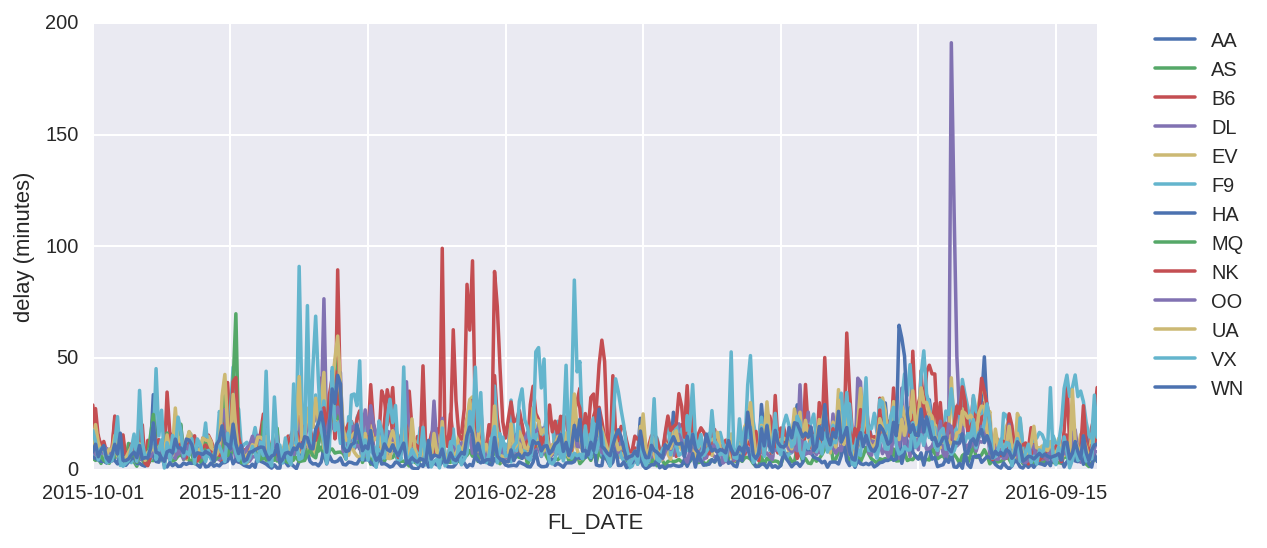

In [39]:
#fig, ax = matplotlib.pyplot.subplots(1,1)
#df_2016.groupby('UNIQUE_CARRIER').resample('D').delay.mean().plot(ax=ax)
DFGroup = df_2016.groupby(['UNIQUE_CARRIER','FL_DATE'])

DFGPlot = DFGroup.mean().unstack('UNIQUE_CARRIER').DEP_DELAY_NEW.plot(kind='line', figsize=(9,4))
DFGPlot.set_ylabel('delay (minutes)')
DFGPlot.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#matplotlib.pyplot.legend([v[0] for v in df_2016.groupby('UNIQUE_CARRIER')['UNIQUE_CARRIER']])

#df_2016.groupby('UNIQUE_CARRIER').resample('D').delay.mean().plot(legend=True, color = 'r')

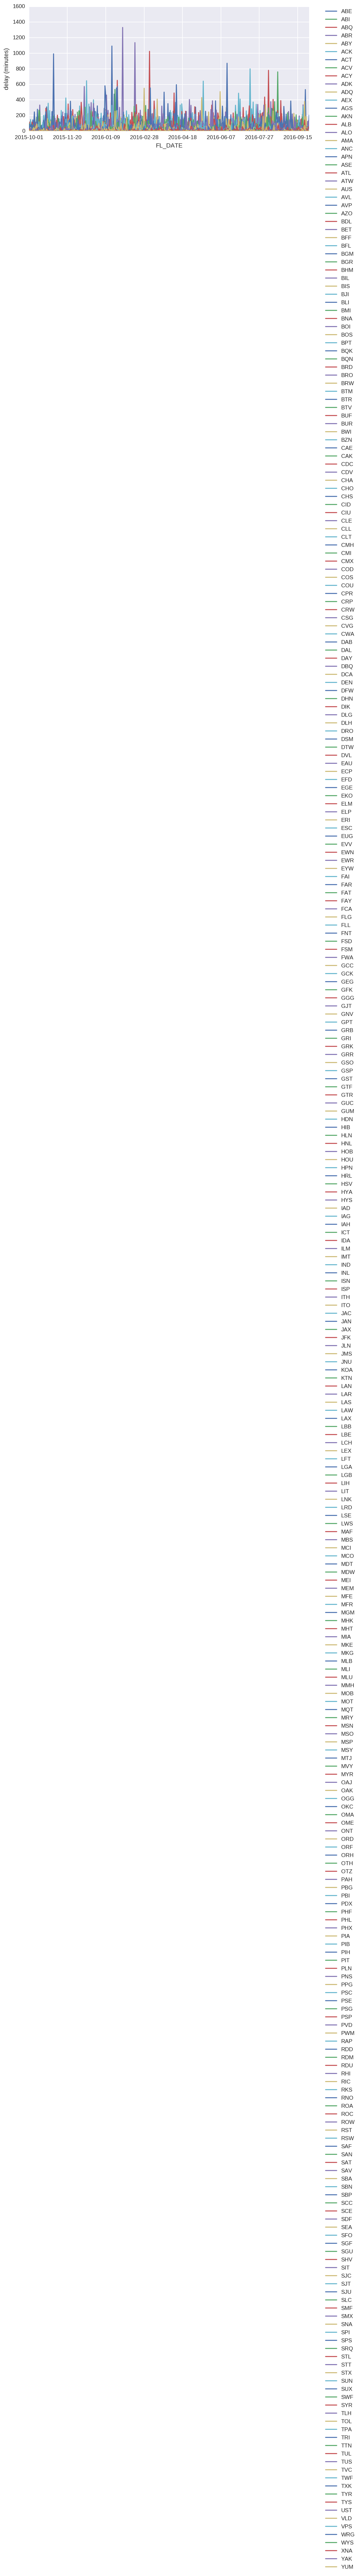

In [40]:
DFGroup = df_2016.groupby(['ORIGIN','FL_DATE'])

DFGPlot = DFGroup.mean().unstack('ORIGIN').DEP_DELAY_NEW.plot(kind='line', figsize=(9,4))
DFGPlot.set_ylabel('delay (minutes)')
DFGPlot.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [53]:

df_2016.index = pd.to_datetime(df_2016['FL_DATE'])
del df_2016['FL_DATE']
#plt_AAdate = 



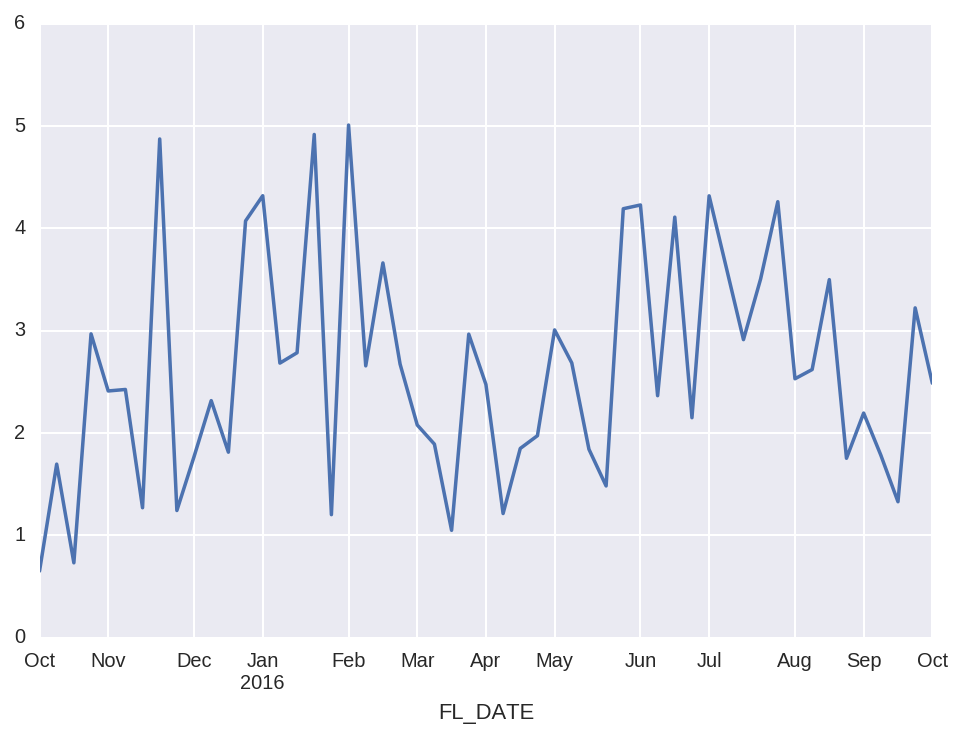

In [42]:
plotweadf_2016.resample('W').WEATHER_DELAY.mean().plot()
myplot.set_ylabel("delay(minutes)")

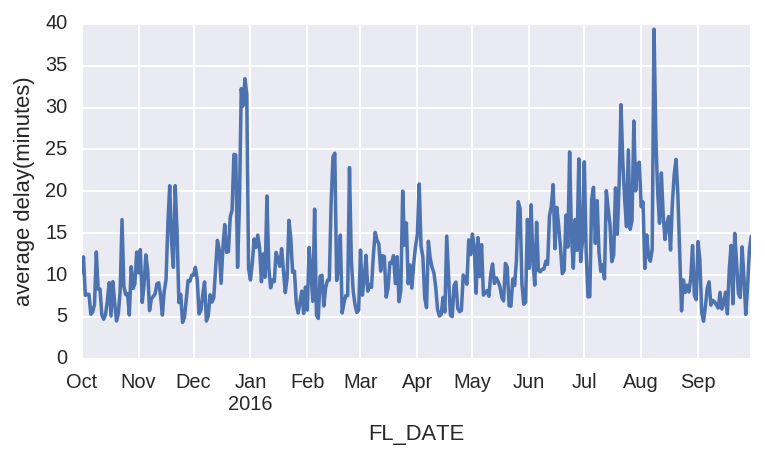

In [198]:
plotdepdelay = df_2016.resample('D').DEP_DELAY_NEW.mean().plot(figsize=(6,3))
plotdepdelay.set_ylabel("average delay(minutes)")

In [44]:
dfDFW = df_2016[df_2016.ORIGIN=='DFW']
dfSEA = df_2016[df_2016.ORIGIN=='SEA']



(0, 2400)

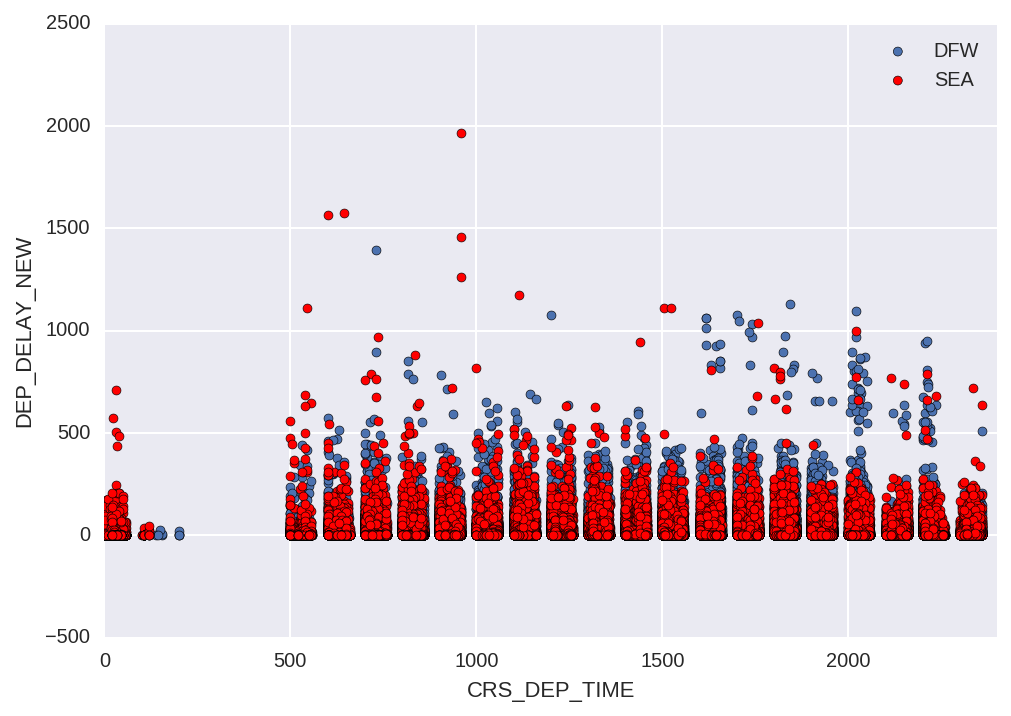

In [45]:
plt_DFWtime = dfDFW.plot.scatter(x='CRS_DEP_TIME', y = 'DEP_DELAY_NEW',label = 'DFW')
dfSEA.plot.scatter(ax=plt_DFWtime,x='CRS_DEP_TIME', y = 'DEP_DELAY_NEW', color = 'r', label = 'SEA')
lines, labels = plt_DFWtime.get_legend_handles_labels()
plt_DFWtime.legend(lines[:2], labels[:2], loc='best')
plt_DFWtime.set_xlim(0, 2400)

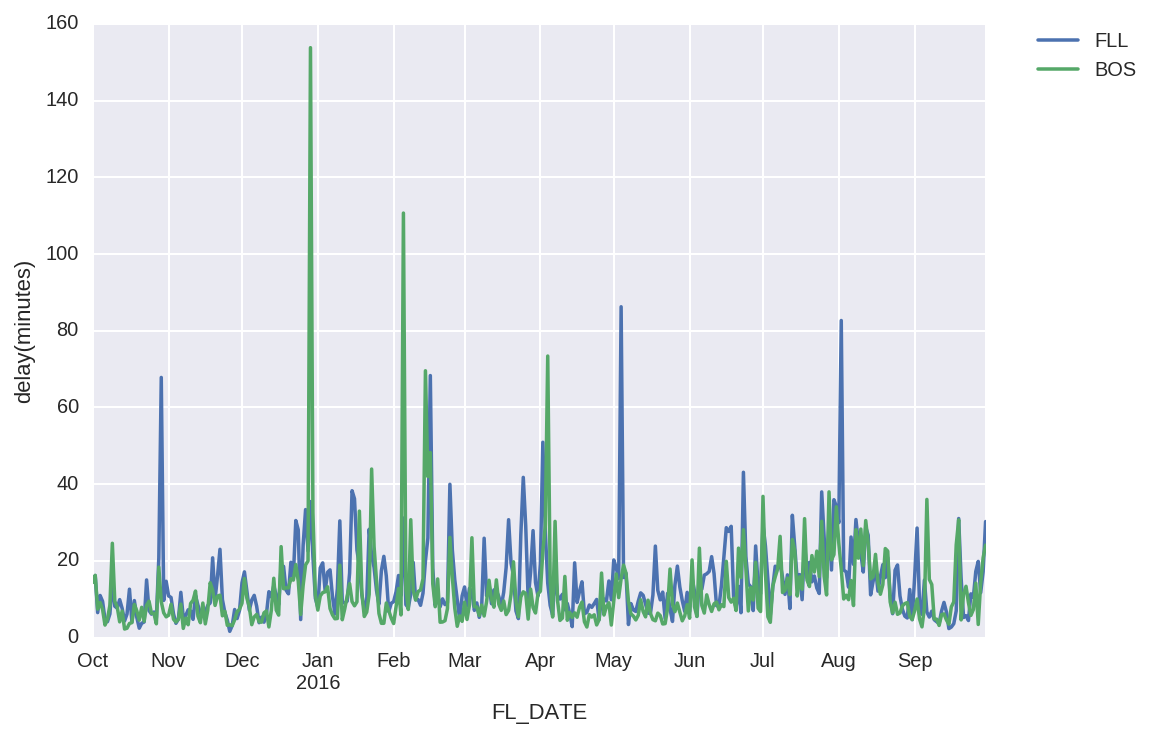

In [46]:
dfFLL = df_2016[df_2016.ORIGIN=='FLL']

myplot = dfFLL.resample('D').DEP_DELAY_NEW.mean().plot(label = 'FLL')
dfBOS = df_2016[df_2016.ORIGIN=='BOS']

dfBOS.resample('D').DEP_DELAY_NEW.mean().plot(ax = myplot,label = 'BOS')
myplot.set_ylabel("delay(minutes)")
myplot.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In Florida we can see weather delays in May (hurricane season???) while in Boston there are delays in the winter (snow!)

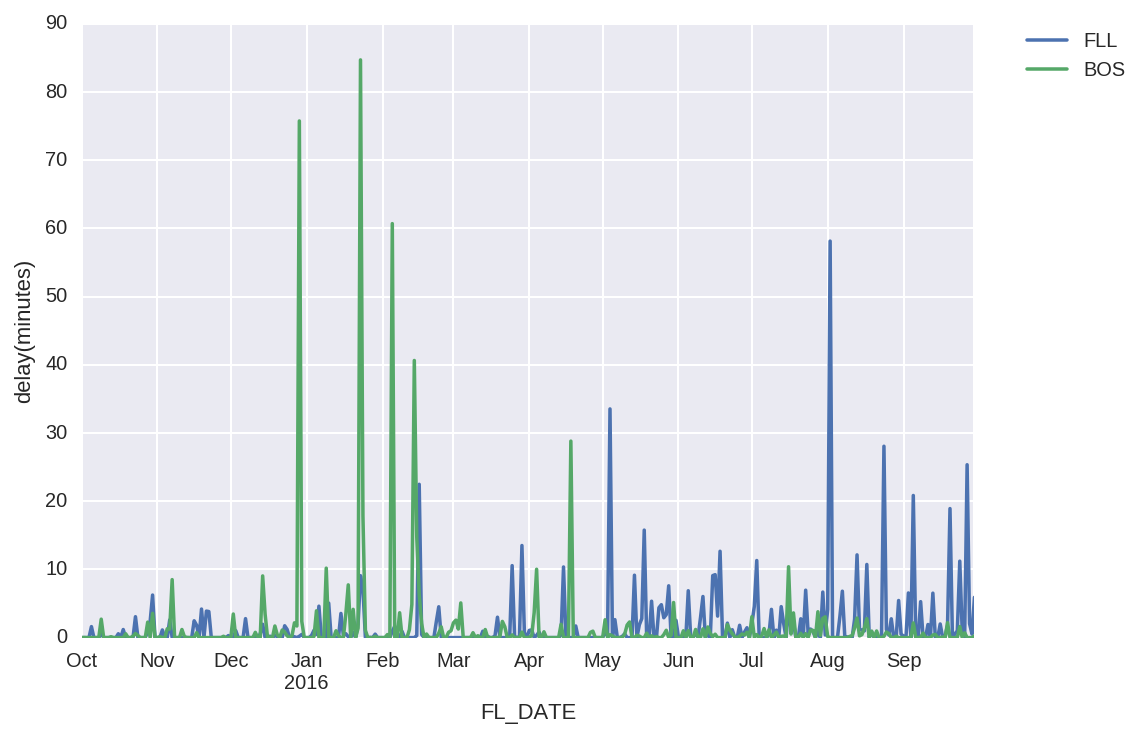

In [47]:
dfFLL = df_2016[df_2016.ORIGIN=='FLL']

myplot = dfFLL.resample('D').WEATHER_DELAY.mean().plot(label = 'FLL')
dfBOS = df_2016[df_2016.ORIGIN=='BOS']

dfBOS.resample('D').WEATHER_DELAY.mean().plot(ax = myplot,label = 'BOS')
#dfPVD = df_2016[df_2016.ORIGIN=='PVD']

#dfPVD.resample('D').WEATHER_DELAY.mean().plot(ax = myplot,label = 'PVD')
myplot.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
myplot.set_ylabel("delay(minutes)")

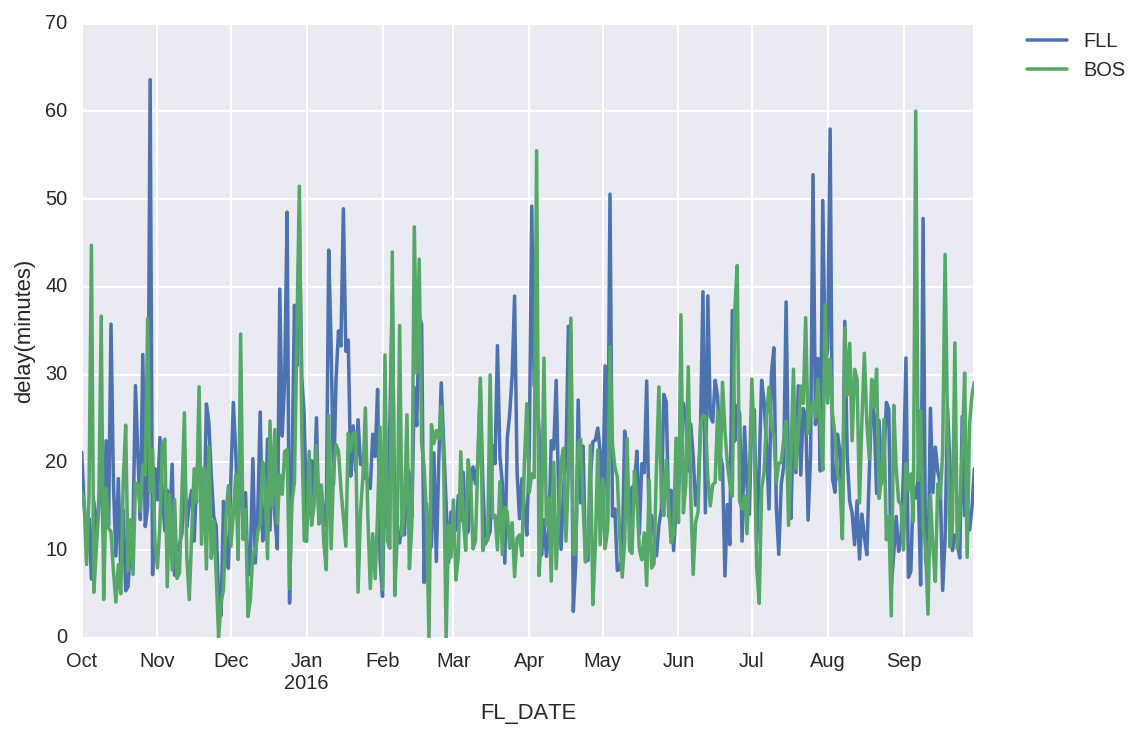

In [56]:
dfFLL = df_2016[df_2016.ORIGIN=='FLL']
dfBOS = df_2016[df_2016.ORIGIN=='BOS']

myplot = dfFLL.resample('D').LATE_AIRCRAFT_DELAY.mean().plot(label = 'FLL')


dfBOS.resample('D').LATE_AIRCRAFT_DELAY.mean().plot(ax = myplot,label = 'BOS')
#dfPVD = df_2016[df_2016.ORIGIN=='PVD']

#dfPVD.resample('D').WEATHER_DELAY.mean().plot(ax = myplot,label = 'PVD')
myplot.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
myplot.set_ylabel("delay(minutes)")

In [127]:
airports = [ dict(
        type = 'scattergeo',
        locationmode = 'USA-states',
        lon = df_airports['LONGITUDE'],
        lat = df_airports['LATITUDE'],
        hoverinfo = 'text',
        text = df_airports['AIRPORT'],
        mode = 'markers',
        marker = dict( 
            size=2, 
            color='rgb(255, 0, 0)',
            line = dict(
                width=3,
                color='rgba(68, 68, 68, 0)'
            )
        ))]

In [182]:
flights_df = pd.DataFrame({'UNIQUE_CARRIER':df_2016['UNIQUE_CARRIER'],'FL_NUM': df_2016['FL_NUM'],'ORIGIN_AIRPORT_ID':df_2016['ORIGIN_AIRPORT_ID'],'ORIGIN':df_2016['ORIGIN'],'DEST_AIRPORT_ID':df_2016['DEST_AIRPORT_ID'],'DEST':df_2016['DEST']})
flights_df = pd.DataFrame.drop_duplicates(flights_df)


In [183]:
df_airports = pd.read_csv('326801255_T_MASTER_CORD.csv')
flights_df = flights_df.join(df_airports.set_index('AIRPORT_ID'), on='ORIGIN_AIRPORT_ID')
#flights_df[:10]
flights_df.columns = ['DEST','DEST_AIRPORT_ID','FL_NUM','ORIGIN','ORIGIN_AIRPOT_ID','UNIQUE_CARRIER','OR_AIR','ORIGIN_LAT','ORIGIN_LON','AIRPORT_IS_LATE','None']
flights_df = flights_df[flights_df.AIRPORT_IS_LATE == 1]
df_airports = pd.read_csv('326801255_T_MASTER_CORD.csv')
flights_df = flights_df.join(df_airports.set_index('AIRPORT_ID'), on='DEST_AIRPORT_ID')
flights_df = flights_df[flights_df.AIRPORT_IS_LATEST == 1]

In [49]:
airports_df = pd.DataFrame.drop_duplicates(flights_df[['ORIGIN','ORIGIN_LAT','ORIGIN_LON']])

In [184]:
airportless = [ dict(
        type = 'scattergeo',
        locationmode = 'USA-states',
        lon =airports_df['ORIGIN_LON'],
        lat =airports_df['ORIGIN_LAT'],
        hoverinfo = 'text',
        text = airports_df['ORIGIN'],
        mode = 'markers',
        marker = dict( 
            size=2, 
            color='rgb(255, 0, 0)',
            line = dict(
                width=3,
                color='rgba(68, 68, 68, 0)'
            )
        ))]

In [188]:
flights_df = flights_df[flights_df.UNIQUE_CARRIER == 'AA']
flights_df = flights_df[flights_df.FL_NUM == 6][:1]


In [189]:
flight_paths = []
for index, row in flights_df.iterrows():
    flight_paths.append(
        dict(
            type = 'scattergeo',
            locationmode = 'USA-states',
            lon = [ row['ORIGIN_LON'], row['LONGITUDE'] ],
            lat = [ row['ORIGIN_LAT'], row['LATITUDE'] ],
            mode = 'lines',
            line = dict(
                width = 1,
                color = 'blue',
            ),
            opacity = 0.3,
        )
    )

In [190]:
layout = dict(
        title = 'Flight Path',
        showlegend = False, 
        geo = dict(
            scope='north america',
            projection=dict( type='azimuthal equal area' ),
            showland = True,
            showsubunits = True,
            showcountries = True,
            landcolor = 'rgb(243, 243, 243)',
            countrycolor = 'rgb(204, 204, 204)',
        ),
    )

In [191]:
fig = dict( data=flight_paths + airportless, layout=layout )
py.iplot( fig, filename='flight_paths' )


Now to start modelling!!

In [123]:
mydelays = df_2016['DEP_DELAY_NEW'].tolist()



In [124]:
import numpy as np
df_2016[np.isnan(df_2016['DEP_DELAY_NEW'])]['CANCELLED']

Series([], Name: CANCELLED, dtype: float64)

In [125]:
from collections import defaultdict
delay_sum = defaultdict(float)
count = defaultdict(int)

In [126]:
import math
c = 0
for row, dela in zip(df_2016['ORIGIN'].tolist(), mydelays):
    delay_sum[row] += dela
    count[row] +=1
    c = c+1
    if math.isnan(dela):
        print row
    
    


In [127]:
delay_sum.items()[:10]

[('JFK', 1519461.0),
 ('GSP', 83681.0),
 ('FNT', 31222.0),
 ('GST', 649.0),
 ('SIT', 9298.0),
 ('MIA', 1111813.0),
 ('BOS', 1433053.0),
 ('LIH', 62009.0),
 ('BGM', 11205.0),
 ('LIT', 85794.0)]

In [128]:
avg_delays = dict()
for airport in delay_sum:
    avg_delays[airport] = delay_sum[airport]/float(count[airport])

In [131]:
avg_delays.items()[:10]

[('JFK', 15.597973597224218),
 ('GSP', 11.493064139541271),
 ('FNT', 7.430271299381247),
 ('GST', 7.819277108433735),
 ('SIT', 6.752360203340595),
 ('MIA', 15.741816276830718),
 ('BOS', 12.046410168038264),
 ('LIH', 5.258565128900949),
 ('BGM', 13.029069767441861),
 ('LIT', 9.559220055710306)]

In [152]:
from sklearn import base
from collections import defaultdict

class CityEstimator(base.BaseEstimator, base.RegressorMixin):
    
    def __init__(self):
        self.avg_delays = dict()
    
    def fit(self, X, y):
        delay_sum = defaultdict(float)
        count = defaultdict(int)
        for row, dela in zip(X, y):
            delay_sum[row] += dela
            count[row] +=1
            
        for airport in delay_sum:
            self.avg_delays[airport] = delay_sum[airport]/float(count[airport])
        
        #print avg_delays
        return self
    
    def predict(self, X):
        mylist = []
        for row in X:
            if row in self.avg_delays:
                mylist.append(self.avg_delays[row])
            else:
                mylist.append(0)
        return mylist#[self.avg_stars[row['city']] for row in X]

In [153]:
city_est = CityEstimator()
city_est.fit(df_2016['ORIGIN'].tolist(), mydelays)

CityEstimator()

In [154]:
city_est.predict(df_2016['ORIGIN'].tolist()[:5])

[15.597973597224218,
 15.597973597224218,
 15.597973597224218,
 15.597973597224218,
 13.301073420429368]

In [155]:
dayofweek_est = CityEstimator()
dayofweek_est.fit(df_2016['DAY_OF_WEEK'].tolist(), mydelays)

CityEstimator()

In [157]:
dayofweek_est.predict(df_2016['DAY_OF_WEEK'].tolist()[:5])

[11.969942786244467,
 11.969942786244467,
 11.969942786244467,
 11.969942786244467,
 11.969942786244467]

In [167]:
df_2016.index = pd.to_datetime(df_2016['FL_DATE'])
del df_2016['FL_DATE']

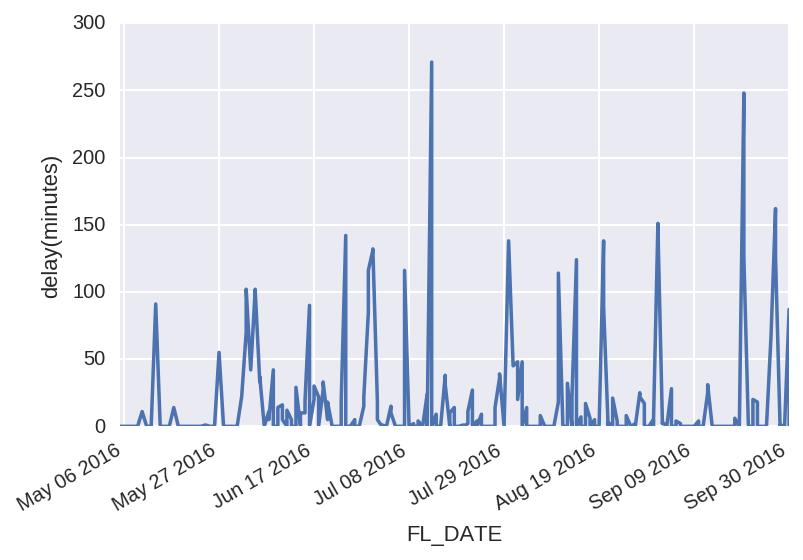

In [192]:
dfAA = df_2016[df_2016.UNIQUE_CARRIER=='AA']
dfAA = dfAA[dfAA.FL_NUM == 100]

myplot = dfAA.DEP_DELAY_NEW.plot(label = 'AA',figsize=(6,4))
myplot.set_ylabel("delay(minutes)")


In [194]:
dfAA.DEP_DELAY_NEW.mean()

17.988721804511279